In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

In [3]:
q_vals = [0.1, 0.3, 0.5, 0.7, 0.9]
q_batches = [11, -3, 1.5, 67, -9.8]
q_sgds_v = np.zeros((5,10))
for i in range(5):
    q_sgds_v[i] = np.random.normal( q_batches[i], 2, 10)
q_sgds= q_sgds_v.T
q_sgds

array([[ 11.61608602,  -0.34355363,   0.12686956,  68.47887697,
         -9.76212098],
       [ 11.41218117,  -0.42535849,   2.62428393,  67.1916812 ,
         -9.75294453],
       [  9.73736475,  -6.90581827,   1.19722076,  67.71045626,
         -8.8774593 ],
       [  7.44351191,  -3.00424947,   3.55301521,  66.55517897,
         -7.4996287 ],
       [  9.44603297,  -2.1772926 ,   2.77837663,  69.36698859,
         -9.13844693],
       [ 12.63242094,  -4.52320381,   1.52235383,  70.56148983,
         -7.86810045],
       [  6.97587347,  -2.70856558,   2.41577116,  67.15524044,
         -9.8811266 ],
       [  9.48949709,  -1.41229243,   1.90048159,  65.23821178,
        -13.44165565],
       [ 10.65964231,  -3.88702395,  -3.21333416,  69.51757355,
         -8.95999494],
       [ 12.4754961 ,  -8.35522651,   0.43040023,  64.14994134,
         -9.95353798]])

In [4]:
c_Norm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=c_Norm, cmap=plt.get_cmap('cool'))
styles = ['-', '--']
names = ['-q batch', '-q sgd']

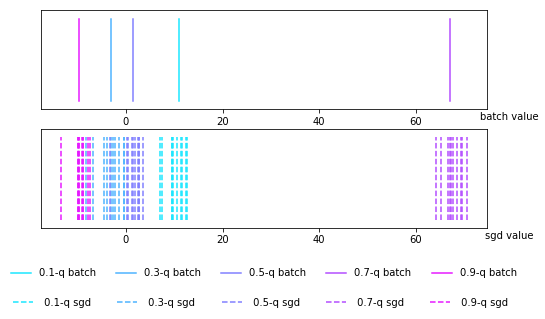

In [10]:
def plot_quantiles(q_vals, q_batches, q_sgds):

    fig = plt.figure(figsize=(8,4))
    ax_batch = fig.add_subplot(211)
    ax_sgd = fig.add_subplot(212, sharex = ax_batch, sharey = ax_batch)

    for idx in range(len(q_vals)):
        colorVal = scalarMap.to_rgba(q_vals[idx])
        qb = q_batches[idx]

        ax_batch.plot([qb,qb], [0,1], styles[0], label= str(q_vals[idx])+names[0], color=colorVal)

        for i in range(q_sgds.shape[0]):
            qs = q_sgds[i][idx]
            if (i==0): 
                ax_sgd.plot([qs,qs], [0,1], styles[1], label=' '+str(+q_vals[idx])+names[1]+'  ', color=colorVal)
            else: 
                ax_sgd.plot([qs,qs], [0,1], styles[1], color=colorVal)


    ax_batch.set_xlabel('batch value')
    ax_batch.xaxis.set_label_coords(1.05, -0.025)

    ax_batch.set_ylim([-0.1,1.1])

    ax_sgd.set_yticks([])
    ax_sgd.set_ylim([-0.1,1.1])
    ax_sgd.set_xlabel('sgd value')
    ax_sgd.xaxis.set_label_coords(1.05, -0.025)

    
    ax_batch.legend(loc='lower center', bbox_to_anchor=(0.5, -1.8),
            frameon=False, ncol=len(q_vals))
    ax_sgd.legend(loc='lower center', bbox_to_anchor=(0.5, -0.9),
        frameon=False, ncol=len(q_vals))
        
    return fig
                    
fig = plot_quantiles(q_vals, q_batches, q_sgds)
